<a href="https://colab.research.google.com/github/NSworks/Knowledge-Engineering/blob/main/PRO6_12c_s19048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dla danych “CIFAR10 small image classification” z biblioteki Keras zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

170500096/170498071 [==============================] - 6s 0us/step


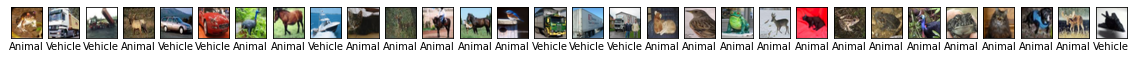

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np

def divide(y_data):
  counter = 0
  iterations = len(y_data)
# dzielimy na zwierzęta i pojazdy na podstawie info ze strony 
  for i in range(iterations):
    # vehicle
    if y_data[i] == 0 or y_data[i] == 1 or y_data[i] == 8  or y_data[i] == 9: 
      y_data[i] = 0
      counter+=1
    # animal
    elif  y_data[i] == 2 or y_data[i] == 3 or y_data[i] == 4  or y_data[i] == 5  or y_data[i] == 6 or y_data[i] == 7: 
      y_data[i] = 1
      counter+=1
    
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#normalizacja
X_train = X_train / 255.0
X_test = X_test / 255.0

divide(y_train)
divide(y_test)

plt.figure(figsize = (20,20))
classes = ['Vehicle', 'Animal']
images_quantity = 30
for i in range(images_quantity):
  plt.subplot(1, images_quantity, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
plt.show()


#W oparciu o sieć konwolucyjną, zgodnie z wskazaniami prowadzącego, zaproponuj klasyfikator, klasyfikujący dwie z dziesięciu klas



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_train, y_train))
model.save('miw_s19048_f_test_model{}_fit.h5'.format(1))

Epoch 1/20
782/782 [==============================] - 38s 7ms/step - loss: 0.4039 - accuracy: 0.8186 - val_loss: 0.2690 - val_accuracy: 0.8925
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2581 - accuracy: 0.8952 - val_loss: 0.4641 - val_accuracy: 0.7949
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2452 - accuracy: 0.9022 - val_loss: 0.4416 - val_accuracy: 0.8129
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2339 - accuracy: 0.9064 - val_loss: 0.4554 - val_accuracy: 0.8098
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2207 - accuracy: 0.9127 - val_loss: 0.2997 - val_accuracy: 0.8775
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.2100 - accuracy: 0.9153 - val_loss: 0.1902 - val_accuracy: 0.9249
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.2081 - accuracy: 0.9191 - val_loss: 0.1848 - val_accuracy: 0.9283
Epoch

In [ ]:
from tensorflow import keras
model = keras.models.load_model('miw_s19048_f_test_model{}_fit.h5'.format(1))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.9332600235939026
loss: 0.1678725928068161


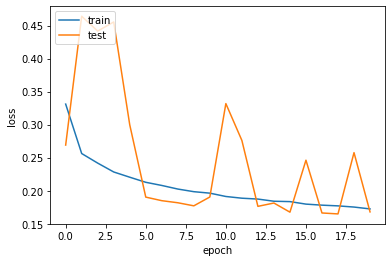

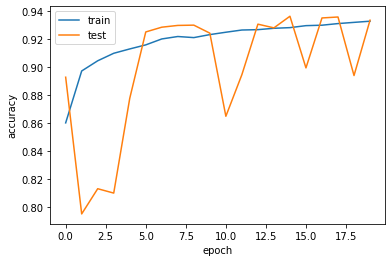

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Zaproponuj klasyfikator z jedną, dwiema oraz trzema warstwami konwolucyjnymi,

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# 1 warstwa konwolucji
model_one = Sequential()
model_one.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_one.add(MaxPooling2D((2, 2)))
model_one.add(Flatten())
model_one.add(Dense(64, activation = 'relu'))
model_one.add(Dense(2, activation = 'softmax'))

model_one.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_one.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_train, y_train))
model_one.save('miw_s19048_f_test_model{}_fit.h5'.format(1))

# 2 warstwy konwolucji
model_two = Sequential()
model_two.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Conv2D(64, (3, 3), activation='relu'))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Flatten())
model_two.add(Dense(64, activation = 'relu'))
model_two.add(Dense(2, activation = 'softmax'))

model_two.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_two.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_train, y_train))
model_two.save('miw_s19048_f_test_model{}_fit.h5'.format(2))

# 3 wartwy konwolucji
model_three = Sequential()
model_three.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(64, (3, 3), activation='relu'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(64, (3, 3), activation='relu'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Flatten())
model_three.add(Dense(64, activation = 'relu'))
model_three.add(Dense(2, activation = 'softmax'))

model_three.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_three.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_train, y_train))
model_three.save('miw_s19048_f_test_model{}_fit.h5'.format(3))

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.4254 - accuracy: 0.8114 - val_loss: 0.3265 - val_accuracy: 0.8568
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.2566 - accuracy: 0.8979 - val_loss: 0.3627 - val_accuracy: 0.8619
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.2161 - accuracy: 0.9149 - val_loss: 0.2805 - val_accuracy: 0.8967
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 0.1943 - accuracy: 0.9252 - val_loss: 0.1628 - val_accuracy: 0.9395
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.1759 - accuracy: 0.9337 - val_loss: 0.1441 - val_accuracy: 0.9450
Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.3970 - accuracy: 0.8240 - val_loss: 0.2415 - val_accuracy: 0.9020
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 0.2432 - accuracy: 0.9040 - val_loss: 0.1863 - val_accuracy: 0.9276
Epoch 3/5
782

#Porównaj wyniki z poprzedniego punktu i zaproponuj optymalny klasyfikator dla danego problemu.

accuracy: 0.9449599981307983
loss: 0.14409875869750977


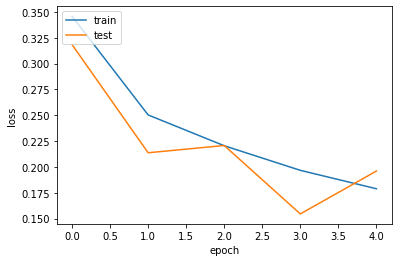

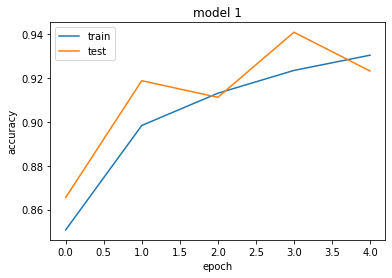

accuracy: 0.9466000199317932
loss: 0.1397717446088791


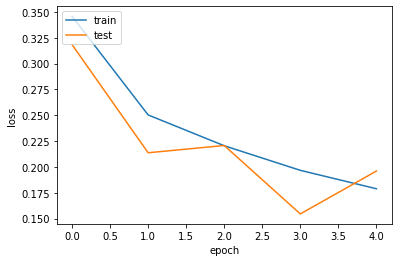

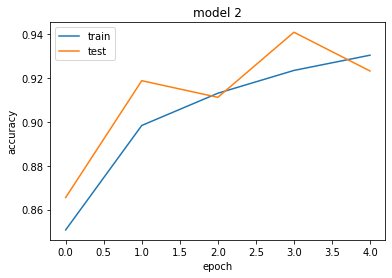

accuracy: 0.9231799840927124
loss: 0.19597437977790833


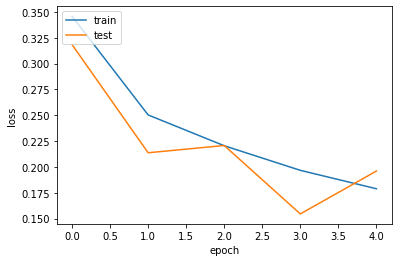

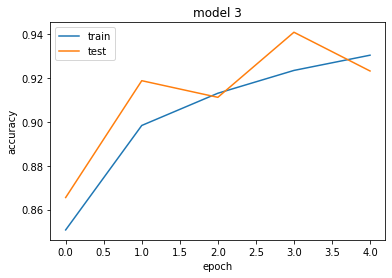

In [ ]:
from tensorflow import keras

model_one = keras.models.load_model('miw_s19048_f_test_model{}_fit.h5'.format(1))
loss, acc = model_one.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 1')
plt.show()


model_two = keras.models.load_model('miw_s19048_f_test_model{}_fit.h5'.format(2))
loss, acc = model_two.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 2')
plt.show()

model_three = keras.models.load_model('miw_s19048_f_test_model{}_fit.h5'.format(3))
loss, acc = model_three.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 3')
plt.show()